In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path
import imghdr
import os

data_dir = "../hair_types"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        if filepath.exists():  # Check if the file exists before opening it
            img_type = imghdr.what(filepath)
            if img_type is None:
                print(f"{filepath} is not an image")
                os.remove(filepath)
            elif img_type not in img_type_accepted_by_tf:
                print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
                os.remove(filepath)
        else:
            print(f"{filepath} does not exist.")


..\hair_types\Straight_Hair\graphicstock-half-length-of-young-handsome-caucasian-reddish-straight-hair-woman-taking-a-selfie-looking-in-camera-smiling-vanity-social-network-concept_BaZNfnukZ_SB_PM.jpg does not exist.
..\hair_types\Straight_Hair\graphicstock-young-handsome-asiatic-long-brown-straight-hair-woman-taking-selfie-outdoor-in-the-city-with-a-smartphone-smiling-vanity-technology-social-network-concept_B6fyU2Ok-_SB_PM.jpg does not exist.
..\hair_types\Straight_Hair\graphicstock-young-handsome-caucasian-reddish-straight-hair-woman-sitting-on-a-small-wall-holding-a-tablet-taking-a-selfie-doing-grimace-technology-social-network-youthful-concept_BTFpe2_1W_SB_PM.jpg does not exist.


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (64, 64)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../hair_types",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../hair_types",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size, 
    labels='inferred',
    label_mode='categorical'
)

Found 981 files belonging to 3 classes.
Using 785 files for training.
Found 981 files belonging to 3 classes.
Using 196 files for validation.


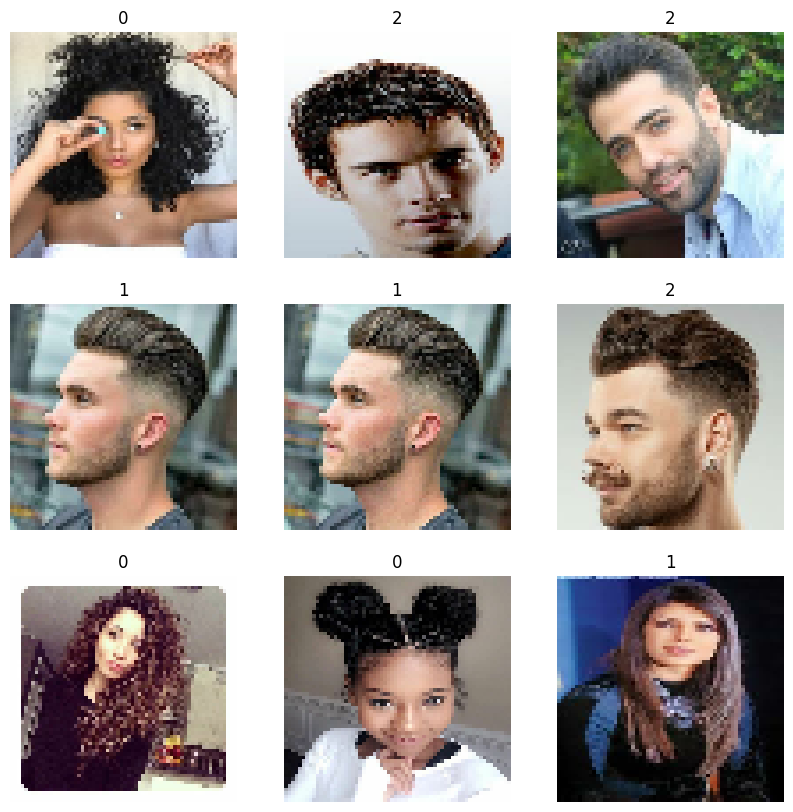

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

- 0 curly hair
- 1 straight hair
- 2 wavy hair

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(keras.Input(shape=image_size + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

model.add is used to add layers

3 = 3 channels

rescaling layer to normalize the values from 0 to 1

dilation rate - 1 lang siya kasi magkakatabi lang siya, if dagdagan magkakaroon ng spaces in between


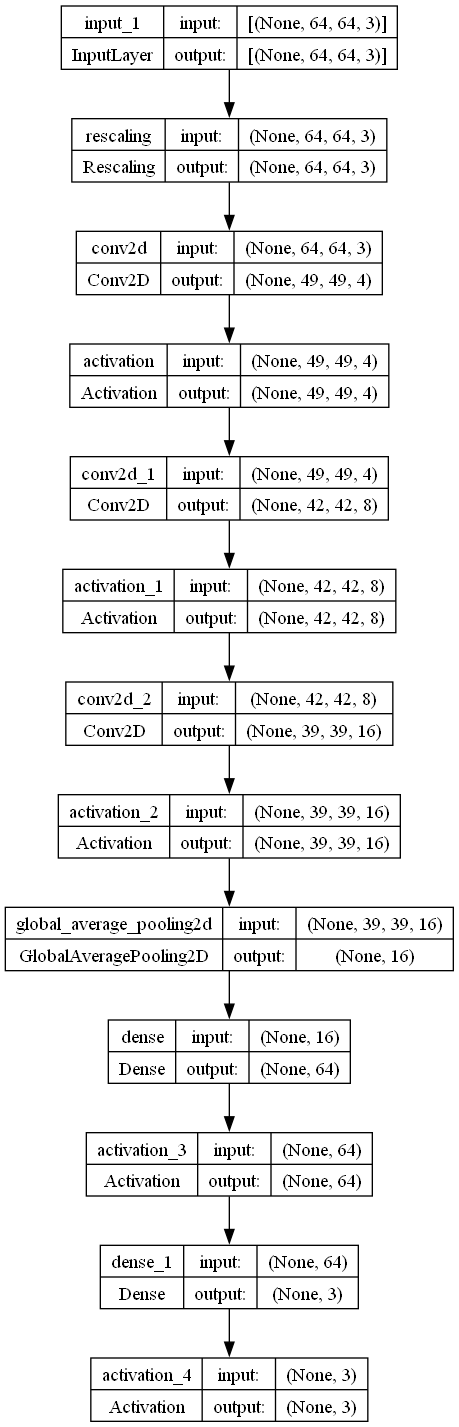

In [6]:
tf.keras.utils.plot_model(model, to_file='model_test.png', show_shapes=True)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 49, 49, 4)         3076      
                                                                 
 activation (Activation)     (None, 49, 49, 4)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 8)         2056      
                                                                 
 activation_1 (Activation)   (None, 42, 42, 8)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 16)        2064      
                                                                 
 activation_2 (Activation)   (None, 39, 39, 16)        0

In [8]:
epochs = 50

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()],
)

history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/50
25/25 [==============================] - 11s 315ms/step - loss: 1.1005 - accuracy: 0.3274 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4847 - val_loss: 1.0991 - val_accuracy: 0.2857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4802
Epoch 2/50
25/25 [==============================] - 8s 298ms/step - loss: 1.0975 - accuracy: 0.3682 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5216 - val_loss: 1.0960 - val_accuracy: 0.4031 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5599
Epoch 3/50
25/25 [==============================] - 13s 444ms/step - loss: 1.0955 - accuracy: 0.3834 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5514 - val_loss: 1.0978 - val_accuracy: 0.3010 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5232
Epoch 4/50
25/25 [==============================] - 12s 414ms/step - loss: 1.0973 - accuracy: 0.3503 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5293 - val_loss: 1.1057 - v

In [9]:
# Load and test an image of curly hair
img_curly = keras.preprocessing.image.load_img(
    "../hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=image_size
)
img_array_curly = keras.preprocessing.image.img_to_array(img_curly)
img_array_curly = tf.expand_dims(img_array_curly, 0)  # Create batch axis

predictions_curly = model.predict(img_array_curly)
print(
    "CURLY: This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions_curly[0])
)

# Load and test an image of straight hair
img_straight = keras.preprocessing.image.load_img(
    "../hair_types/Straight_Hair/1-short-spiky-mens-haircut.jpg", target_size=image_size
)
img_array_straight = keras.preprocessing.image.img_to_array(img_straight)
img_array_straight = tf.expand_dims(img_array_straight, 0)  # Create batch axis

predictions_straight = model.predict(img_array_straight)
print(
    "STRAIGHT: This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions_straight[0])
)

# Load and test an image of wavy hair
img_wavy = keras.preprocessing.image.load_img(
    "../hair_types/Wavy_Hair/2-Short-High-Volume-Hairstyle.jpg", target_size=image_size
)
img_array_wavy = keras.preprocessing.image.img_to_array(img_wavy)
img_array_wavy = tf.expand_dims(img_array_wavy, 0)  # Create batch axis

predictions_wavy = model.predict(img_array_wavy)
print(
    "WAVY: This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions_wavy[0])
)

1/1 [==============================] - 2s 2s/step
CURLY: This image is 0.89 percent curly hair, 0.08 percent straight hair, and 0.03 percent wavy hair.
1/1 [==============================] - 0s 302ms/step
STRAIGHT: This image is 0.12 percent curly hair, 0.43 percent straight hair, and 0.45 percent wavy hair.
1/1 [==============================] - 0s 357ms/step
WAVY: This image is 0.14 percent curly hair, 0.41 percent straight hair, and 0.45 percent wavy hair.


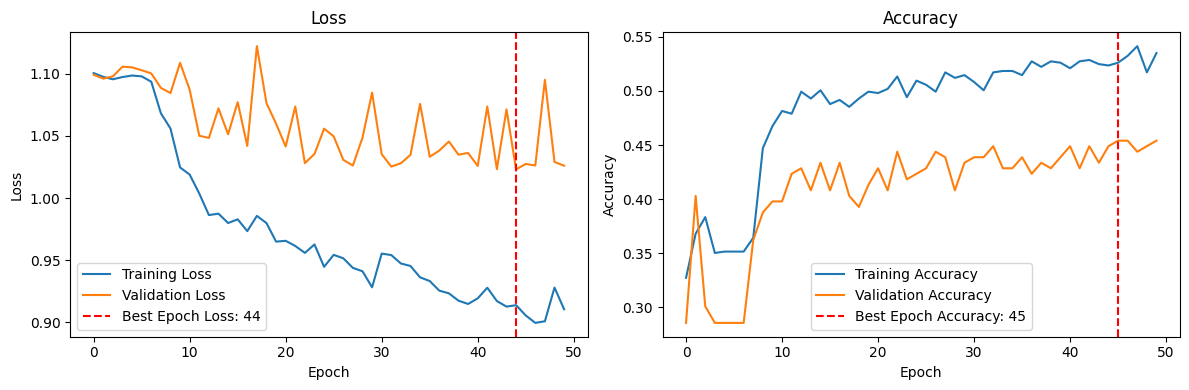

In [10]:
import matplotlib.pyplot as plt

# Plot training history for loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Mark the best epoch for validation loss
best_epoch_loss = np.argmin(history.history['val_loss'])
plt.axvline(x=best_epoch_loss, color='r', linestyle='--', label=f'Best Epoch Loss: {best_epoch_loss}')
plt.legend()

# Plot training history for accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Mark the best epoch for validation accuracy
best_epoch_accuracy = np.argmax(history.history['val_accuracy'])
plt.axvline(x=best_epoch_accuracy, color='r', linestyle='--', label=f'Best Epoch Accuracy: {best_epoch_accuracy}')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
val_loss, val_accuracy = model.evaluate(val_ds)

7/7 [==============================] - 5s 161ms/step - loss: 1.0261 - accuracy: 0.4541 - precision: 0.5909 - recall: 0.1327 - auc: 0.6629


ValueError: too many values to unpack (expected 2)

In [ ]:
val_loss, val_accuracy, val_precision, val_recall, val_auc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation AUC: {val_auc}")